('CSE', 'cse3', 'DM', 'Ranjib Banerjee'): Color 1
('CSE', 'cse3', 'AI', 'Atul Mishra'): Color 5
('CSE', 'cse3', 'NS', 'Satyendr'): Color 0
('CSE', 'cse3', 'DIP', 'Sandeep'): Color 4
('CSE', 'cse3', 'IOT', 'Rajiv Dey'): Color 3
('CSE', 'cse3', 'SEM', 'Kiran Khatter'): Color 2
('CSE', 'cse4', 'DM', 'Ranjib Banerjee'): Color 4
('CSE', 'cse4', 'AI', 'Soharab Hussain'): Color 3
('CSE', 'cse4', 'NS', 'Satyendr'): Color 1
('CSE', 'cse4', 'DIP', 'Sandeep'): Color 5
('CSE', 'cse4', 'IOT', 'Rajiv Dey'): Color 2
('CSE', 'cse4', 'SEM', 'Kiran Khatter'): Color 0
('CSE', 'cse1', 'DM', 'Rishi'): Color 4
('CSE', 'cse1', 'AI', 'Soharab Hussain'): Color 0
('CSE', 'cse1', 'NS', 'Satyendr'): Color 2
('CSE', 'cse1', 'DIP', 'Devanjali'): Color 5
('CSE', 'cse1', 'IOT', 'Rajiv Dey'): Color 1
('CSE', 'cse1', 'SEM', 'Kiran Khatter'): Color 3
('CSE', 'cse2', 'DM', 'Rishi'): Color 5
('CSE', 'cse2', 'AI', 'Soharab Hussain'): Color 2
('CSE', 'cse2', 'NS', 'Satyendr'): Color 3
('CSE', 'cse2', 'DIP', 'Devanjali'): Co

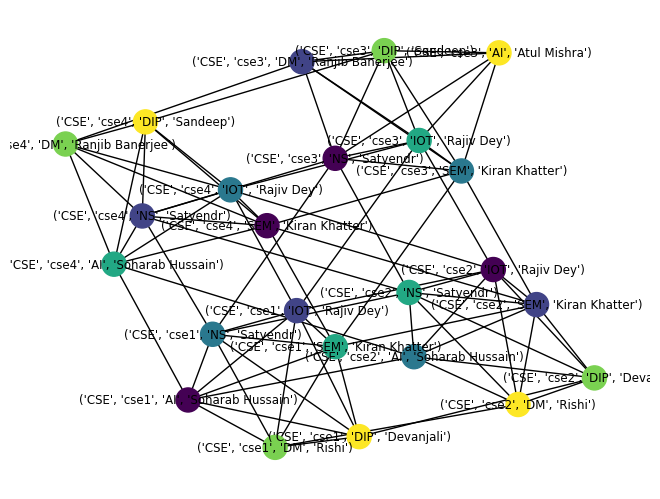

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Define the courses, sections, subjects, and teachers
courses = [
    ('CSE', 'cse3', 'DM', 'Ranjib Banerjee'),
    ('CSE', 'cse3', 'AI', 'Atul Mishra'),
    ('CSE', 'cse3', 'NS', 'Satyendr'),
    ('CSE', 'cse3', 'DIP', 'Sandeep'),
    ('CSE', 'cse3', 'IOT', 'Rajiv Dey'),
    ('CSE', 'cse3', 'SEM', 'Kiran Khatter'),
    ('CSE', 'cse4', 'DM', 'Ranjib Banerjee'),
    ('CSE', 'cse4', 'AI', 'Soharab Hussain'),
    ('CSE', 'cse4', 'NS', 'Satyendr'),
    ('CSE', 'cse4', 'DIP', 'Sandeep'),
    ('CSE', 'cse4', 'IOT', 'Rajiv Dey'),
    ('CSE', 'cse4', 'SEM', 'Kiran Khatter'),
    ('CSE', 'cse1', 'DM', 'Rishi'),
    ('CSE', 'cse1', 'AI', 'Soharab Hussain'),
    ('CSE', 'cse1', 'NS', 'Satyendr'),
    ('CSE', 'cse1', 'DIP', 'Devanjali'),
    ('CSE', 'cse1', 'IOT', 'Rajiv Dey'),
    ('CSE', 'cse1', 'SEM', 'Kiran Khatter'),
    ('CSE', 'cse2', 'DM', 'Rishi'),
    ('CSE', 'cse2', 'AI', 'Soharab Hussain'),
    ('CSE', 'cse2', 'NS', 'Satyendr'),
    ('CSE', 'cse2', 'DIP', 'Devanjali'),
    ('CSE', 'cse2', 'IOT', 'Rajiv Dey'),
    ('CSE', 'cse2', 'SEM', 'Kiran Khatter'),
]

days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Create a graph and add nodes (courses)
G = nx.Graph()
for course in courses:
    G.add_node(course)

# Add edges between courses that cannot be scheduled at the same time
for course1 in courses:
    for course2 in courses:
        if course1 != course2 and (
                course1[1] == course2[1] or  # Same section
                course1[3] == course2[3]  # Same teacher
        ):
            G.add_edge(course1, course2)

# Use the greedy graph coloring algorithm
coloring = nx.coloring.greedy_color(G, strategy="largest_first", interchange=True)

# Print the colors assigned to each course
for course, color in coloring.items():
    print(f"{course}: Color {color}")

# Initialize timetables for each section
# Update the range of time slots to include 8 slots
timetables = {section: {day: {i: [] for i in range(1, 9)} for day in days_of_week} for section in set(course[1] for course in courses)}

# Helper function to check for conflicts, including a lunch break slot
def has_conflict_with_lunch(section, day, time_slot, course, timetables):
    # Ensure that the lunch break is scheduled at slot 5
    if time_slot == 5:  # Slot 5 reserved for lunch break
        return True
    
    for other_course in timetables[section][day][time_slot]:
        if (
            other_course[1] == course[3] or  # Same teacher
            other_course[0] == course[2] or  # Same subject
            time_slot == 8  # Lunch break slot
        ):
            return True
    return False

# Fill timetables with courses while avoiding conflicts and ensuring non-repetitive schedules
for course, color in coloring.items():
    section = course[1]

    # Randomly shuffle the days of the week to ensure non-repetitive schedules
    random_days = random.sample(days_of_week, len(days_of_week))

    # Iterate over the shuffled days to find a suitable schedule
    for day in random_days:
        time_slot = random.choice(list(range(1, 9)))  # Randomly select a time slot from 1 to 8

        # Ensure that the time slot exists in the dictionary
        if time_slot not in timetables[section][day]:
            timetables[section][day][time_slot] = []

        # Check for conflicts and find a suitable time slot, considering the lunch break
        while has_conflict_with_lunch(section, day, time_slot, course, timetables):
            time_slot = random.choice(list(range(1, 9)))

        # Assign the course to the selected day and time slot
        timetables[section][day][time_slot].append((course[2], course[3]))



from tabulate import tabulate

# Iterate through each section's timetable
for section, section_timetables in timetables.items():
    print(f"\nTimetable for {section}:\n")
    
    # Initialize table data for the section
    section_table = []
    section_table.append(["Day/Slot"] + [f"Slot {i}" for i in range(1, 9)])  # Update for 8 slots
    
    # Populate the table with course information
    for day in days_of_week:
        day_row = [day]
        for time_slot in range(1, 9):  # Update for 8 slots
            courses = section_timetables[day].get(time_slot, [])
            course_info = "" if not courses else f"{courses[0][0]} with {courses[0][1]}"
            day_row.append(course_info)
        section_table.append(day_row)
    
    # Print the table for the section with formatted headers, separators, and aligned columns
    print(tabulate(section_table, headers="firstrow", tablefmt="pretty", colalign=("center",) * len(section_table[0])))




# Draw the graph (optional)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=list(coloring.values()), cmap=plt.cm.viridis, font_color='black',font_size=8.5)
plt.show()

('CSE', 'cse1', 'DM', 'Rishi Asthana'): Color 0
('CSE', 'cse1', 'AI', 'Soharab Hussain'): Color 1
('CSE', 'cse1', 'NS', 'Satyendr singh'): Color 2
('CSE', 'cse1', 'DIP', 'Devanjali Relan'): Color 3
('CSE', 'cse1', 'IOT', 'Rajiv Dey'): Color 4
('CSE', 'cse1', 'SEM', 'Kiran Khatter'): Color 5
('CSE', 'cse2', 'DM', 'Rishi Asthana'): Color 0
('CSE', 'cse2', 'AI', 'Soharab Hussain'): Color 1
('CSE', 'cse2', 'NS', 'Satyendr singh'): Color 2
('CSE', 'cse2', 'DIP', 'Devanjali Relan'): Color 3
('CSE', 'cse2', 'IOT', 'Rajiv Dey'): Color 4
('CSE', 'cse2', 'SEM', 'Kiran Khatter'): Color 5
('CSE', 'cse3', 'DM', 'Ranjib Banerjee'): Color 0
('CSE', 'cse3', 'AI', 'Atul Mishra'): Color 1
('CSE', 'cse3', 'NS', 'Satyendr singh'): Color 2
('CSE', 'cse3', 'DIP', 'Sandeep kumar'): Color 3
('CSE', 'cse3', 'IOT', 'Rajiv Dey'): Color 4
('CSE', 'cse3', 'SEM', 'Kiran Khatter'): Color 5
('CSE', 'cse4', 'DM', 'Ranjib Banerjee'): Color 0
('CSE', 'cse4', 'AI', 'Soharab Hussain'): Color 1
('CSE', 'cse4', 'NS', 'Satye

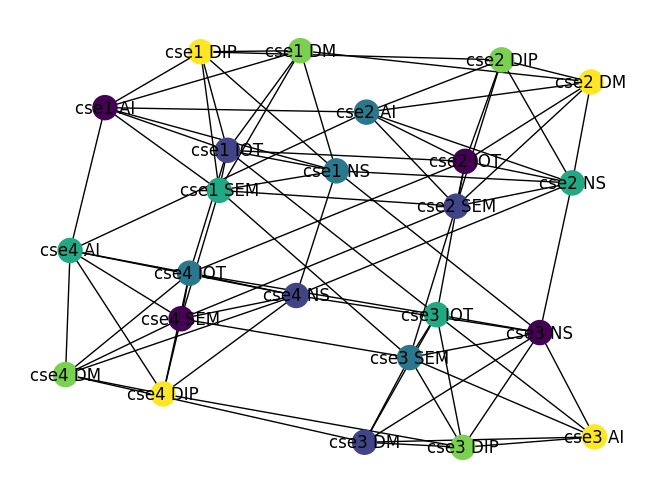

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from tabulate import tabulate

# Define the courses, sections, subjects, and teachers
courses = [
    ('CSE', 'cse3', 'DM', 'Ranjib Banerjee'),
    ('CSE', 'cse3', 'AI', 'Atul Mishra'),
    ('CSE', 'cse3', 'NS', 'Satyendr singh'),
    ('CSE', 'cse3', 'DIP', 'Sandeep kumar'),
    ('CSE', 'cse3', 'IOT', 'Rajiv Dey'),
    ('CSE', 'cse3', 'SEM', 'Kiran Khatter'),
    ('CSE', 'cse4', 'DM', 'Ranjib Banerjee'),
    ('CSE', 'cse4', 'AI', 'Soharab Hussain'),
    ('CSE', 'cse4', 'NS', 'Satyendr singh'),
    ('CSE', 'cse4', 'DIP', 'Sandeep kumar'),
    ('CSE', 'cse4', 'IOT', 'Rajiv Dey'),
    ('CSE', 'cse4', 'SEM', 'Kiran Khatter'),
    ('CSE', 'cse1', 'DM', 'Rishi Asthana'),
    ('CSE', 'cse1', 'AI', 'Soharab Hussain'),
    ('CSE', 'cse1', 'NS', 'Satyendr singh'),
    ('CSE', 'cse1', 'DIP', 'Devanjali Relan'),
    ('CSE', 'cse1', 'IOT', 'Rajiv Dey'),
    ('CSE', 'cse1', 'SEM', 'Kiran Khatter'),
    ('CSE', 'cse2', 'DM', 'Rishi Asthana'),
    ('CSE', 'cse2', 'AI', 'Soharab Hussain'),
    ('CSE', 'cse2', 'NS', 'Satyendr singh'),
    ('CSE', 'cse2', 'DIP', 'Devanjali Relan'),
    ('CSE', 'cse2', 'IOT', 'Rajiv Dey'),
    ('CSE', 'cse2', 'SEM', 'Kiran Khatter'),
]

days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

def generate_timetable_graph_coloring(section_data):
    # Create a graph and add nodes (courses)
    G = nx.Graph()
    for course in section_data:
        G.add_node(course)

    # Add edges between courses that cannot be scheduled at the same time
    for course1 in section_data:
        for course2 in section_data:
            if course1 != course2 and (
                    course1[1] == course2[1] or  # Same section
                    course1[3] == course2[3]  # Same teacher
            ):
                G.add_edge(course1, course2)

    # Use the greedy graph coloring algorithm
    coloring = nx.coloring.greedy_color(G, strategy="largest_first", interchange=True)

    # Print the colors assigned to each course
    for course, color in coloring.items():
     print(f"{course}: Color {color}")

    # Initialize timetables for the section
    timetables = {day: {i: [] for i in range(1, 9)} for day in days_of_week}

    # Helper function to check for conflicts, including a lunch break slot
    def has_conflict_with_lunch(day, time_slot, course):
        # Ensure that the lunch break is scheduled at slot 5
        if time_slot == 5:  # Slot 5 reserved for lunch break
            return True

        for other_course in timetables[day][time_slot]:
            if (
                other_course[1] == course[3] or  # Same teacher
                other_course[0] == course[2] or  # Same subject
                time_slot == 8  # Lunch break slot
            ):
                return True
        return False

    # Fill timetables with courses while avoiding conflicts and ensuring non-repetitive schedules
    for course, color in coloring.items():
        # Randomly shuffle the days of the week to ensure non-repetitive schedules
        random_days = random.sample(days_of_week, len(days_of_week))

        # Iterate over the shuffled days to find a suitable schedule
        for day in random_days:
            time_slot = random.choice(list(range(1, 9)))  # Randomly select a time slot from 1 to 8

            # Ensure that the time slot exists in the dictionary
            if time_slot not in timetables[day]:
                timetables[day][time_slot] = []

            # Check for conflicts and find a suitable time slot, considering the lunch break
            while has_conflict_with_lunch(day, time_slot, course):
                time_slot = random.choice(list(range(1, 9)))

            # Assign the course to the selected day and time slot
            timetables[day][time_slot].append((course[2], course[3]))

    return timetables


# Separate data for each section
cse1_data = [entry for entry in courses if entry[1] == "cse1"]
cse2_data = [entry for entry in courses if entry[1] == "cse2"]
cse3_data = [entry for entry in courses if entry[1] == "cse3"]
cse4_data = [entry for entry in courses if entry[1] == "cse4"]

# Generate timetables for each section
timetable_cse1 = generate_timetable_graph_coloring(cse1_data)
timetable_cse2 = generate_timetable_graph_coloring(cse2_data)
timetable_cse3 = generate_timetable_graph_coloring(cse3_data)
timetable_cse4 = generate_timetable_graph_coloring(cse4_data)

# Print timetables
def print_timetable(timetable, section):
    print(f"\nTimetable for {section}:\n")
    section_table = []
    section_table.append(["Day/Slot"] + [f"Slot {i}" for i in range(1, 9)])

    for day in days_of_week:
        day_row = [day]
        for time_slot in range(1, 9):
            courses = timetable[day].get(time_slot, [])
            course_info = "" if not courses else f"{courses[0][0]} with {courses[0][1]}"
            day_row.append(course_info)
        section_table.append(day_row)

    print(tabulate(section_table, headers="firstrow", tablefmt="pretty", colalign=("center",) * len(section_table[0])))

# Print timetables for each section
print_timetable(timetable_cse1, "cse1")
print_timetable(timetable_cse2, "cse2")
print_timetable(timetable_cse3, "cse3")
print_timetable(timetable_cse4, "cse4")

# Draw the graph (optional)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, labels={node: f"{node[1]} {node[2]}" for node in G.nodes}, node_color=list(coloring.values()), cmap=plt.cm.viridis, font_color='black')
plt.show()

In [3]:
# Find the degree of each node
degrees = G.degree()

# Find the node with the highest degree and its degree value
node_with_highest_degree, highest_degree = max(degrees, key=lambda x: x[1])

# Print the result
print(f"The node with the highest degree is {node_with_highest_degree} with a degree of {highest_degree}.")

The node with the highest degree is ('CSE', 'cse3', 'NS', 'Satyendr') with a degree of 8.


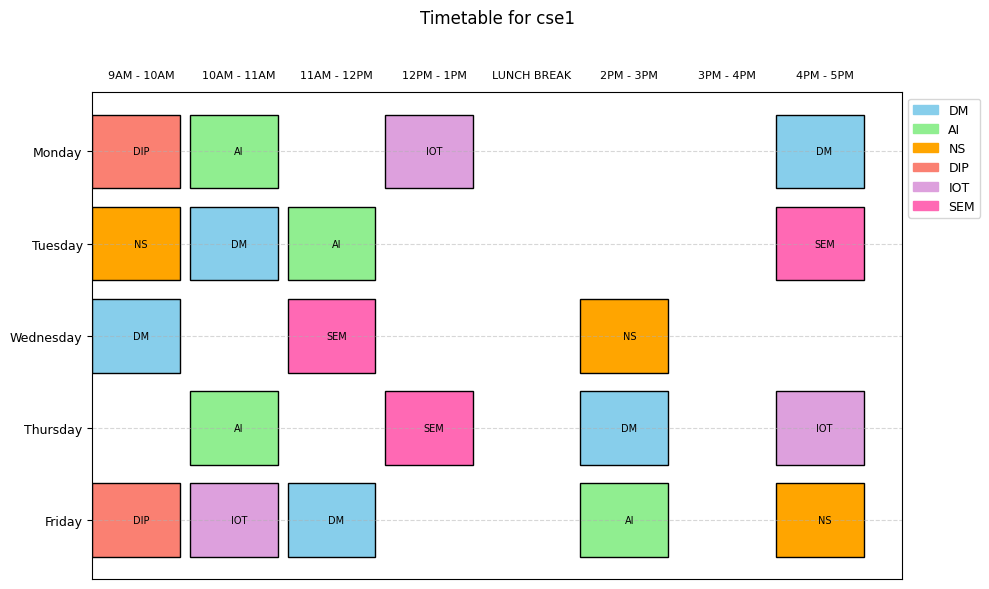

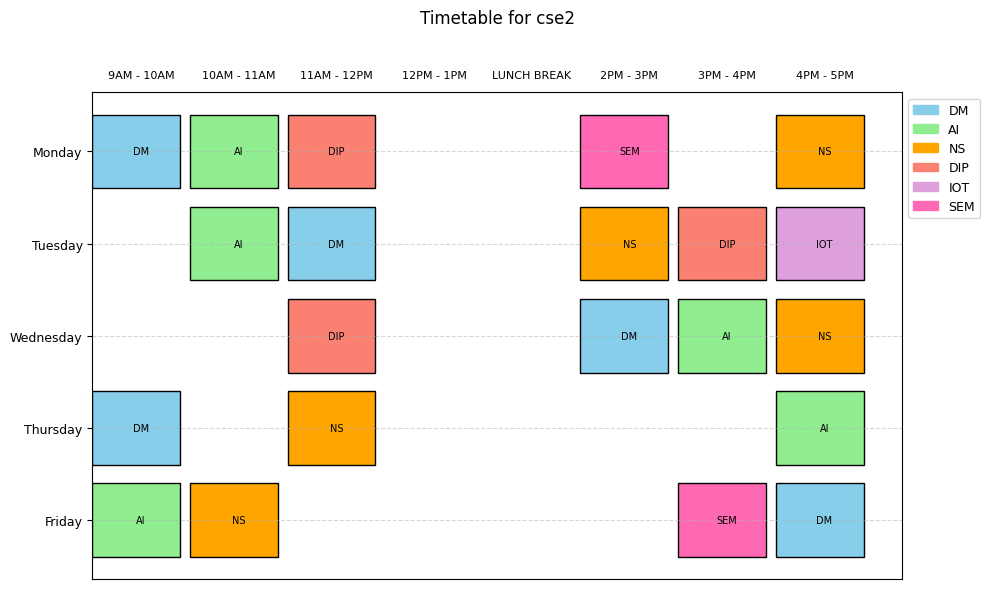

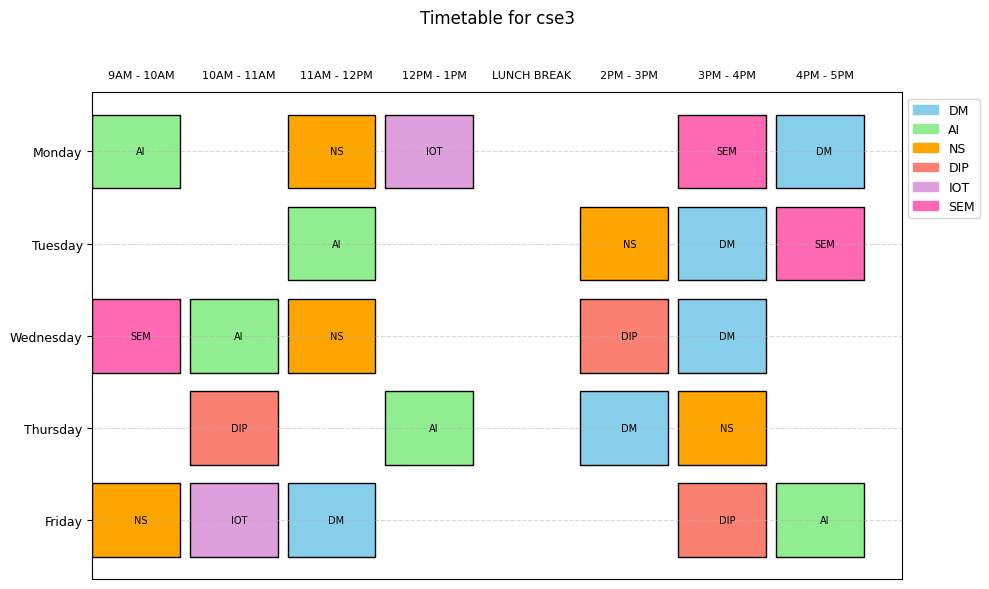

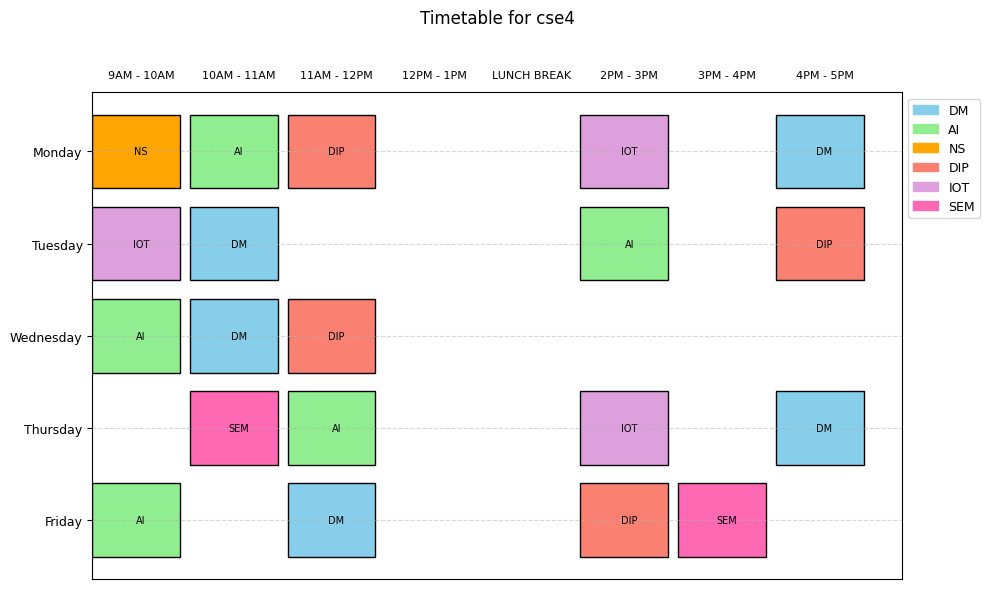

In [4]:
def visualize_timetable(timetable, section):
    plt.figure(figsize=(10, 6))
    plt.title(f"Timetable for {section}", pad=50)  # Add padding to adjust the title's position

    # Create a color map for different courses
    color_map = {
        'DM': 'skyblue',
        'AI': 'lightgreen',
        'NS': 'orange',
        'DIP': 'salmon',
        'IOT': 'plum',
        'SEM': 'hotpink'
    }

    # Mapping the timings
    timings = {
        1: '9AM - 10AM',
        2: '10AM - 11AM',
        3: '11AM - 12PM',
        4: '12PM - 1PM',
        5: 'LUNCH BREAK',
        6: '2PM - 3PM',
        7: '3PM - 4PM',
        8: '4PM - 5PM'
    }

    # Reversing the days_of_week list
    reversed_days_of_week = list(reversed(days_of_week))

    for day_index, day in enumerate(reversed_days_of_week):
        for time_slot in range(1, 9):
            courses = timetable[day].get(time_slot, [])
            if courses:
                course = courses[0]  # Only take the first course in the slot
                course_subject = course[0]
                plt.barh(
                    day_index + 1, 0.9, left=time_slot - 0.5,
                    color=color_map.get(course_subject, 'gray'), edgecolor='black'
                )
                plt.text(time_slot, day_index + 1, f"{course_subject}", color='black', fontsize=7, ha='center', va='center')

    # Plotting the timings on top of the table
    plt.text(0.9, len(reversed_days_of_week) + 1.3,'', color='black', fontsize=10, ha='center')
    for i in range(1, 9):
        plt.text(i, len(reversed_days_of_week) + 0.8, f"{timings[i]}", color='black', fontsize=8, ha='center')

    plt.yticks(range(1, len(reversed_days_of_week) + 1), reversed_days_of_week, fontsize=9)
    plt.xticks([])
    plt.grid(True, linestyle="--", alpha=0.5)

    # Add legend for subjects
    legend_labels = [plt.Rectangle((0, 0), 1, 1, color=color_map.get(subject, 'gray')) for subject in color_map]
    plt.legend(legend_labels, color_map.keys(), loc='upper left', bbox_to_anchor=(1, 1), fontsize=9)

    plt.tight_layout()
    plt.show()

# Visualize timetables for each section
visualize_timetable(timetable_cse1, "cse1")
visualize_timetable(timetable_cse2, "cse2")
visualize_timetable(timetable_cse3, "cse3")
visualize_timetable(timetable_cse4, "cse4")